# <font color = orange> <font size = 8> **An√°lise Explorat√≥ria: Pre√ßos dos Combust√≠veis no Brasil (Maio-Junho/2023)**

---

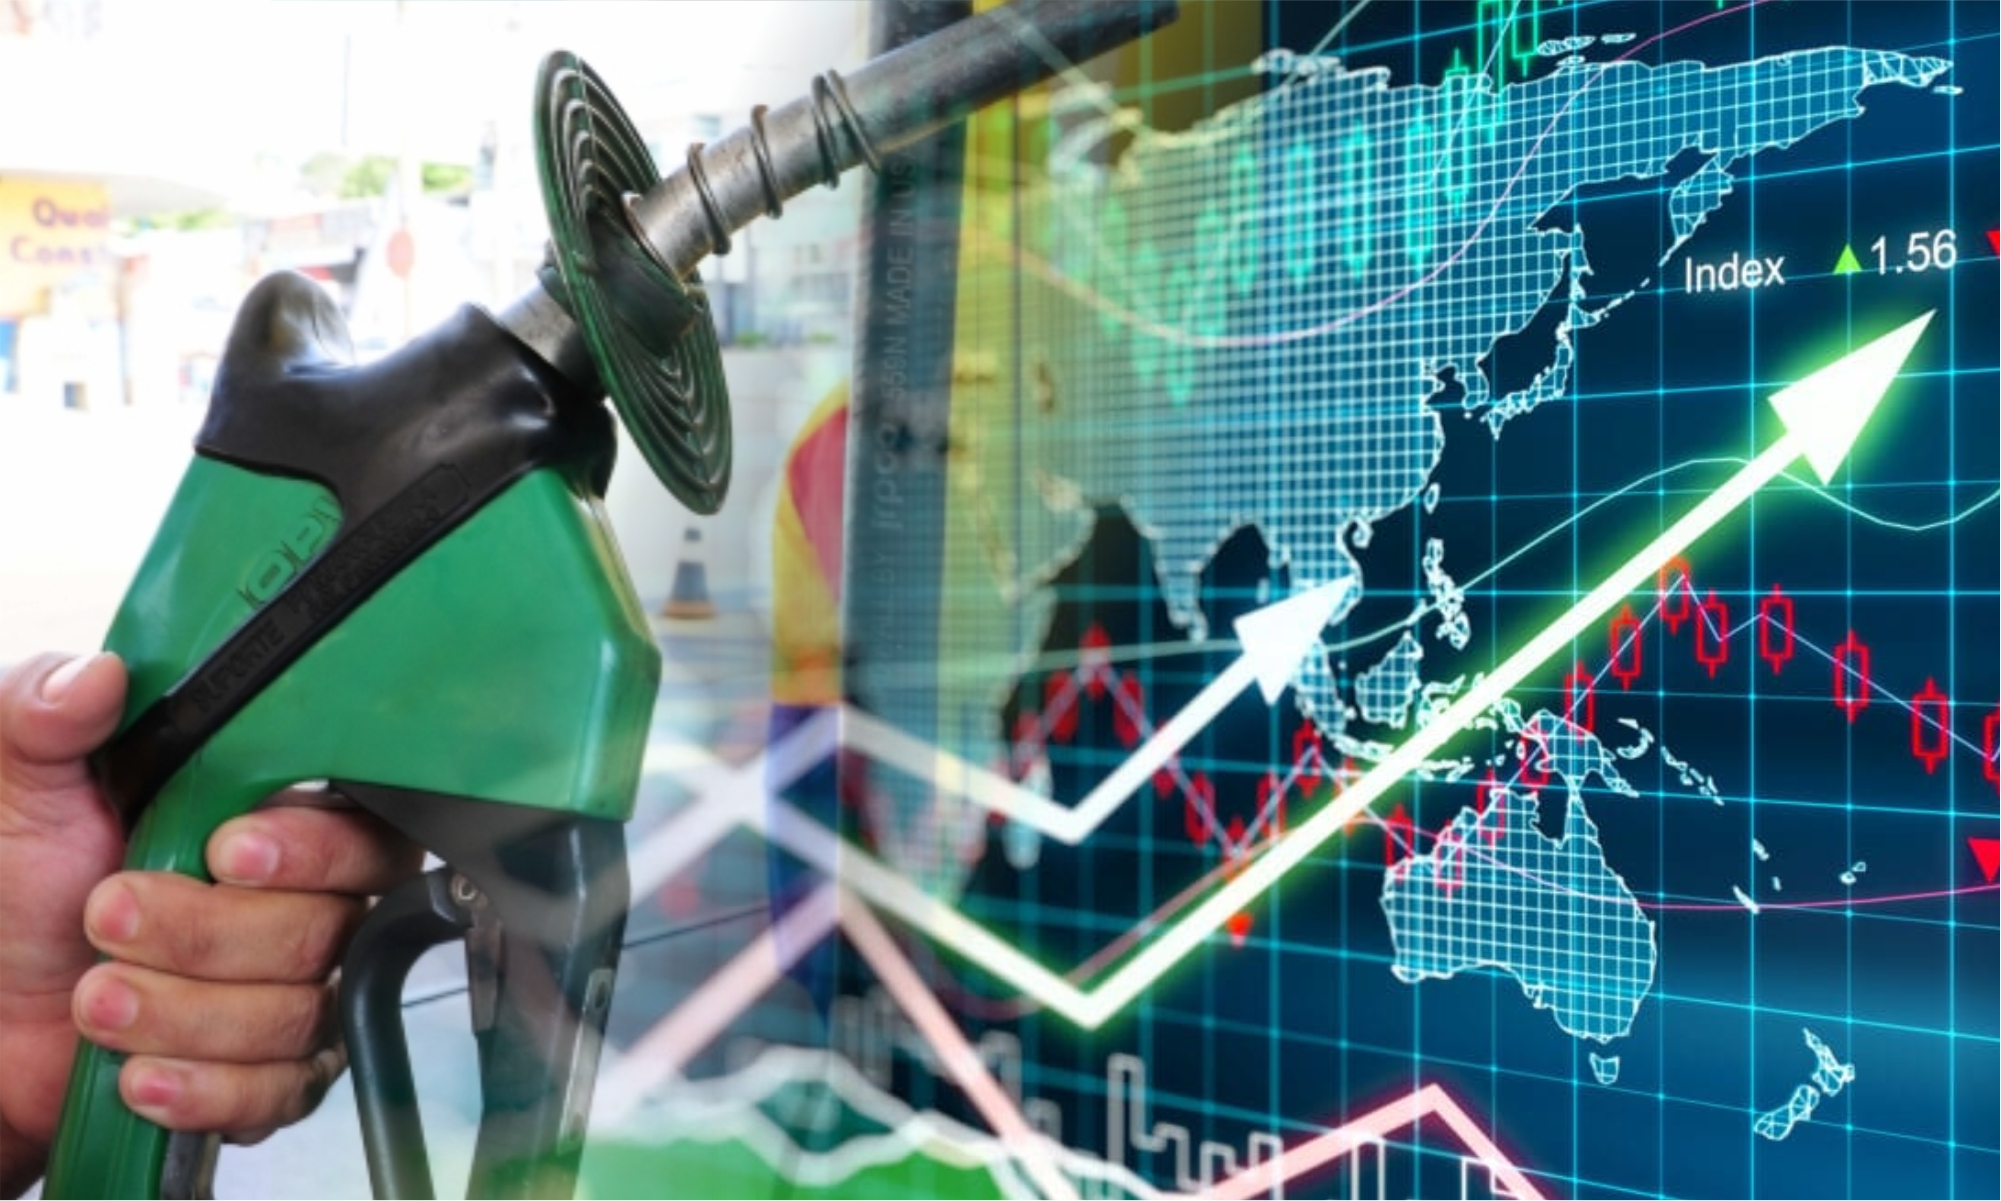

## <font color = orange> <font size = 6> **1. Descri√ß√£o do Projeto**
---

Este projeto tem como objetivo realizar uma an√°lise explorat√≥ria relacionada √† s√©rie hist√≥rica de pre√ßo de venda da gasolina e do etanol. Para esta an√°lise ultilizaremos os dados fornecidos pela <span style="color:LimeGreen; font-style:italic;">Ag√™ncia Nacional de Petr√≥leo e G√°s
Natural e Biocombust√≠veis(ANP)</span>. A seguir veremos os objetivos do projeto, o que ser√° estudado e quais as an√°lises necess√°rias para responder as quest√µes apresentadas e quais problemas podemos resolver com esses insights. Os dados que iremos analisar s√£o de **Etanol Hidratado + Gasolina C** do m√™s de **Maio** e **Junho** de 2023.

---

##### <font color = orange>**1.1. Sobre a ANP**

A ANP √© um centro de refer√™ncia em dados e informa√ß√µes sobre a ind√∫stria de petr√≥leo e g√°s natural no Brasil, que mant√©m o <span style="color:DodgerBlue; font-style:italic;">Banco de Dados de Explora√ß√£o e Produ√ß√£o (BDEP)</span>; divulga as estat√≠sticas oficiais sobre reservas, refino e produ√ß√£o de petr√≥leo, g√°s e biocombust√≠veis no Brasil; realiza e divulga pesquisas sobre qualidade dos combust√≠veis e lubrificantes e sobre o comportamento dos pre√ßos desses produtos; promove estudos sobre o potencial petrol√≠fero e o desenvolvimento do setor; entre outras atividades.

<center><img alt="Logo anp" width="30%" src="./img/anp.jpg"></center>




##### <font color = orange>**1.2. Quais os problemas a serem resolvidos?**

Esta an√°lise tem como objetivo responder as seguintes perguntas:


* 1. Como se comportaram o pre√ßo dos combust√≠veis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tend√™ncia de queda ou diminui√ß√£o?


* 2. Qual o pre√ßo m√©dio da gasolina e do etanol nesses dois meses?


* 3. Quais os 5 estados com o pre√ßo m√©dio da gasolina e do etanol mais caros?


* 4. Qual o pre√ßo m√©dio da gasolina e do etanol por estado?


* 5. Qual o munic√≠pio que possui o menor pre√ßo para a gasolina e para o etanol?


* 6. Qual o munic√≠pio que possui o maior pre√ßo para a gasolina e para o etanol?


* 7. Qual a regi√£o que possui o maior valor m√©dio da gasolina?


* 8. Qual a regi√£o que possui o menor valor m√©dio do etanol?


* 9. H√° alguma correla√ß√£o entre o valor do combust√≠vel (gasolina e etanol) e a regi√£o onde ele √© vendido?


* 10. H√° alguma correla√ß√£o entre o valor do combust√≠vel (gasolina e etanol) e a bandeira que vende ele?


 E mais algumas perguntas que retornem insights interessantes sobre o DataSet.

---

## <font color = orange>**2. Coleta e an√°lise inicial dos dados** 


Primeiramente, para podermos iniciar nossos trabalhos, iremos coletar nossos dados e ter nosso primeiro contato com eles, compreendendo suas caracter√≠sticas que o definem e sua estrutura.


##### <font color = orange>**2.1. Importa√ß√£o das bibliotecas que ser√£o utilizadas**

In [2]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


##### <font color = orange>**2.2. Coleta dos dados necess√°rios para an√°lise** 


Agora iremos coletar os dados que ser√£o ultilizados atrav√©s dos arquivos .csv que est√£o dispon√≠veis no site do [**gov.br**](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis). Ser√£o ultilizados os dados referente ao m√™s de **Maio** e **Junho** de **Etanol Hidratado + Gasolina C**. Iremos juntar os dois meses para formar um √∫nico DataSet, para assim conseguir an√°lisar os dados de forma mais ampla e eficaz.

In [3]:
# Importando os dados de Maio
combustiveis_maio = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv", sep=(";"))
# Importando os dados de Junho
combustiveis_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))

# Concatenando os dados
combustiveis = pd.concat([combustiveis_maio, combustiveis_junho,], ignore_index=True)


##### <font color = orange>**2.3. Conhecendo os Dados**

Abaixo teremos o primeiro contato com o DataSet, mostrando as 5 primeiras e 5 √∫ltimas linhas, onde podemos observar de maneira geral como √© o DataSet coletado.

In [55]:
#Verificar dimens√£o do DataSet
combustiveis.shape

AttributeError: 'list' object has no attribute 'shape'

Com essa checagem, podemos verificar que nosso DataSet cont√©m **107.531 linhas/registros** por **16 colunas/vari√°veis**.

##### <font color = orange>**2.3.2. Checando valores nulos (NaN)**

In [5]:
dados_nulos_qntd = combustiveis.isnull().sum()
dados_nulos_porc = ((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).round(1)
dados_nulos = pd.DataFrame({
    'Frequ√™ncia': dados_nulos_qntd,
    'Porcentagem (%)': dados_nulos_porc
})
dados_nulos.rename_axis('Coluna/V√°riavel', axis='columns', inplace=True)
dados_nulos


Coluna/V√°riavel    Frequ√™ncia  Porcentagem (%)
Regiao - Sigla              0              0.0
Estado - Sigla              0              0.0
Municipio                   0              0.0
Revenda                     0              0.0
CNPJ da Revenda             0              0.0
Nome da Rua                 0              0.0
Numero Rua                 45              0.0
Complemento             83683             77.8
Bairro                    226              0.2
Cep                         0              0.0
Produto                     0              0.0
Data da Coleta              0              0.0
Valor de Venda              0              0.0
Valor de Compra        107531            100.0
Unidade de Medida           0              0.0
Bandeira                    0              0.0

Verificando os valores nulos podemos perceber que a coluna **"Valor de Compra" tem 100% de valores nulos**, e a coluna **"Complemento" com mais de 77% de valores ausentes**. Com esse n√∫mero elevado de valores nulos, essas colunas n√£o ser√£o √∫teis para nossa an√°lise, com isso, podemos retirar elas do nosso DataSet, faremos isso logo mais abaixo.

##### <font color = orange>**2.3.3. Dicion√°rio de Colunas/Vari√°veis**

In [6]:
#Verificando combustiveis
combustiveis.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

Ao verificar as colunas do DataSet, podemos fazer um dicion√°rio para dar um significado mais amplo para elas e ent√£o saberemos exatamente o que √© cada v√°riavel.

- `Regiao - Sigla` - Sigla da Regi√£o.
- `Estado - Sigla` - Sigla da Unidade Federativa (UF).
- `Municipio` - Nome do munic√≠pio.
- `Revenda` - Nome do estabelecimento.
- `CNPJ da Revenda` - N√∫mero do Cadastro Nacional de Pessoa Jur√≠dica.
- `Nome da Rua` - Nome do logradouro.
- `Numero da Rua` - N√∫mero do logradouro.
- `Complemento` - Complemento do logradouro.
- `Bairro` - Nome do bairro.
- `Cep` - N√∫mero do C√≥digo do Endere√ßo Postal (CEP) do logradouro.
- `Produto` - Nome do combust√≠vel pesquisado.
- `Data da Coleta` - Data da coleta do(s) pre√ßo(s).
- `Valor de Venda` - Pre√ßo de venda ao consumidor final praticado pelo revendedor, na data da coleta.
- `Valor de Compra` - Pre√ßo de distribui√ß√£o (pre√ßo de venda da distribuidora para o posto revendedor de combust√≠vel)**.
- `Unidade de Medida` - Unidade de Medida.
- `Bandeira` - Nome da Bandeira da revenda.

##### <font color = orange>**2.3.4. Verificando os tipos de dados**

In [7]:
#Verificar tipos de dados
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     107531 non-null  object 
 1   Estado - Sigla     107531 non-null  object 
 2   Municipio          107531 non-null  object 
 3   Revenda            107531 non-null  object 
 4   CNPJ da Revenda    107531 non-null  object 
 5   Nome da Rua        107531 non-null  object 
 6   Numero Rua         107486 non-null  object 
 7   Complemento        23848 non-null   object 
 8   Bairro             107305 non-null  object 
 9   Cep                107531 non-null  object 
 10  Produto            107531 non-null  object 
 11  Data da Coleta     107531 non-null  object 
 12  Valor de Venda     107531 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  107531 non-null  object 
 15  Bandeira           107531 non-null  object 
dtypes:

Verificando os tipos de dados que nosso DataSet tem, podemos perceber que h√° alguns problemas: A v√°riavel **"Valor de Venda"** e **"Data Coleta"** est√° como do tipo "Object". Isso dificultaria uma an√°lise em cima desses dados pois n√£o est√£o do tipo de dado correto. Faremos essa corre√ß√£o logo abaixo.

##### <font color = orange>**2.3.5 Verificando valores √∫nicos**

In [8]:
#Verificar valores unicos
combustiveis.nunique()

Regiao - Sigla          5
Estado - Sigla         27
Municipio             459
Revenda              6652
CNPJ da Revenda      7481
Nome da Rua          5095
Numero Rua           3001
Complemento          1323
Bairro               3634
Cep                  5750
Produto                 3
Data da Coleta         45
Valor de Venda        387
Valor de Compra         0
Unidade de Medida       1
Bandeira               45
dtype: int64

Apenas verificando os valores √∫nicos do nosso DataSet, podemos tirar algumas informa√ß√µes importantes. Existem **7481 CNPJ cadastrados**, com isso percebemos que uma empresa pode ter um ou mais postos cadastrados nesse banco de dados, al√©m de **45 Bandeiras diferentes** de distribuidor.

---

## üí° <font color = orange>**Curiosidades deste DataSet**  

Com esse conhecimento inicial que tivemos do nosso DataSet podemos obter alguma insights importantes sobre ele.

- **Qual bandeira tem mais postos de combust√≠vel?**

In [9]:
# Criando dataframe com as bandeiras mais frequentes
bandeira_qntd = combustiveis['Bandeira'].value_counts()
bandeira_porc = round(combustiveis['Bandeira'].value_counts(normalize=True) * 100, 1)
bandeira = pd.DataFrame({
    'Frequ√™ncia': bandeira_qntd,
    'Porcentagem (%)': bandeira_porc
})
bandeira.head(5)

Frequ√™ncia  Porcentagem (%)
Bandeira                                  
BRANCA              35939             33.4
IPIRANGA            23480             21.8
VIBRA ENERGIA       23089             21.5
RAIZEN              15779             14.7
ALESAT               4005              3.7

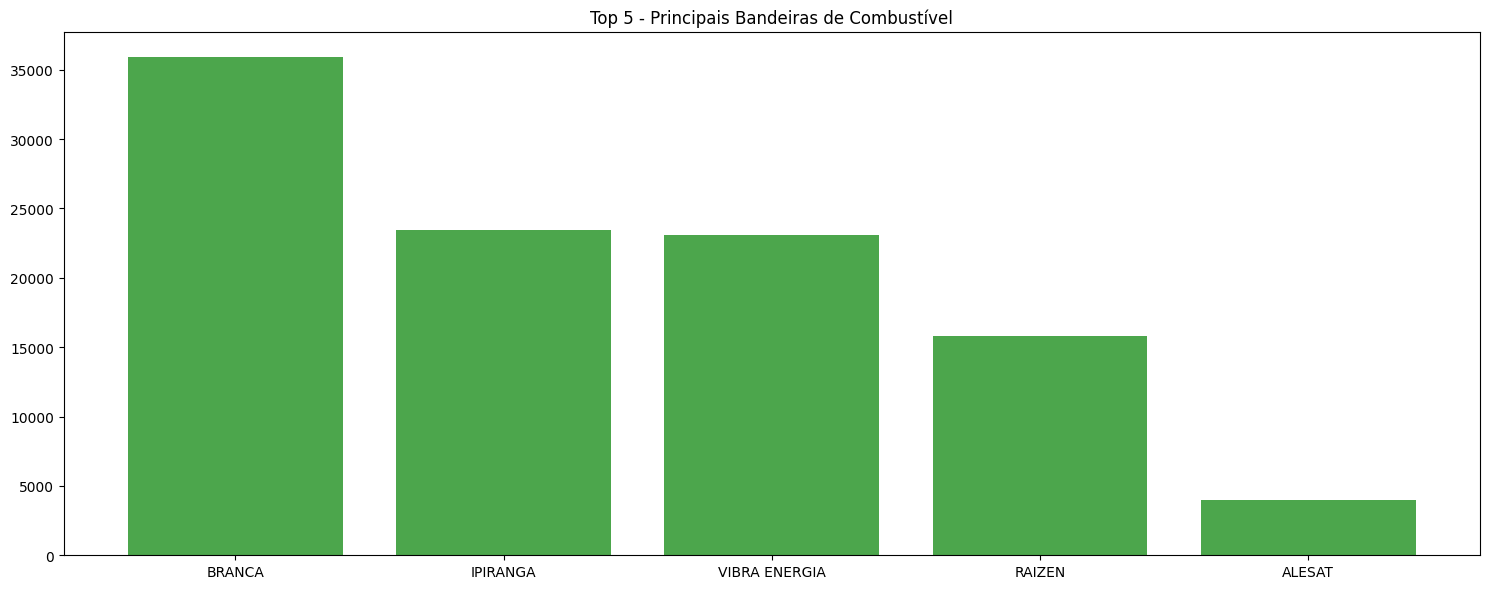

In [10]:
#Criando gr√°fico
top_bandeiras = bandeira.head(5)
plt.figure(figsize=(15, 6)) 
plt.bar(top_bandeiras.index, top_bandeiras['Frequ√™ncia'], color='green', alpha=0.7)
plt.title('Top 5 - Principais Bandeiras de Combust√≠vel')
plt.tight_layout()
plt.show()

Como podemos observar na tabela e tamb√©m visulamente no gr√°fico acima, as chamadas **"Bandeiras Brancas"** que s√£o os postos que n√£o faz nenhuma parceria com uma grande distribuidora, ou seja, os que possui marca pr√≥pria s√£o a maioria no Brasil com mais de 35 mil postos, sendo 33,4% de todas as bandeiras desse DataSet. Em segundo lugar temos a bandeira Ipiranga com mais de 21 mil postos.

- **Qual estado do Brasil tem mais postos de combust√≠veis?**


In [11]:
estado_qtnd_postos = combustiveis['Estado - Sigla'].value_counts()
estado_porc_postos = round(combustiveis['Estado - Sigla'].value_counts(normalize=True) * 100, 1)
postos_estado = pd.DataFrame({
    'Frequ√™ncia': estado_qtnd_postos,
    'Porcentagem (%)': estado_porc_postos
})
postos_estado.head()

Frequ√™ncia  Porcentagem (%)
Estado - Sigla                             
SP                   31103             28.9
MG                   11605             10.8
RJ                    8423              7.8
RS                    7074              6.6
PR                    7014              6.5

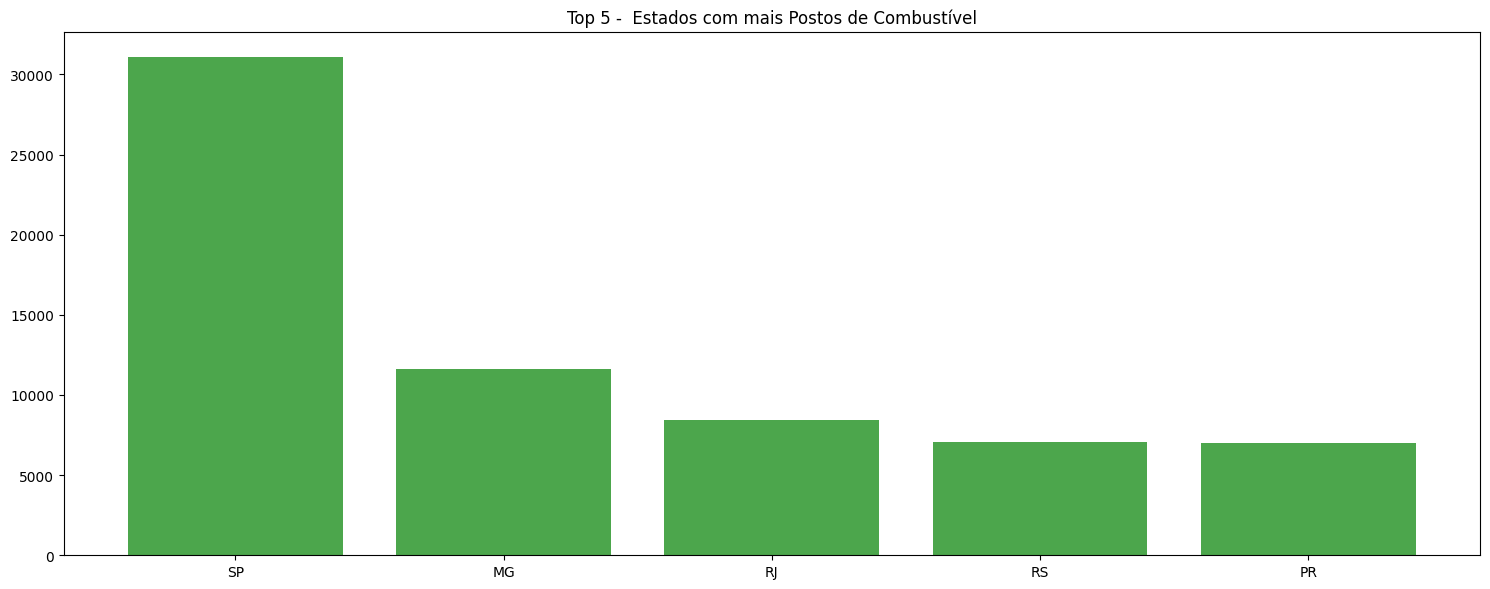

In [12]:
top_postos = postos_estado.head(5)
plt.figure(figsize=(15, 6)) 
plt.bar(top_postos.index, top_postos['Frequ√™ncia'], color='green', alpha=0.7)
plt.title('Top 5 -  Estados com mais Postos de Combust√≠vel')
plt.tight_layout()
plt.show()

Com mais de **30 mil postos de combut√≠veis o estado de S√£o Paulo √© o que mais tem postos de gasolina**, isso representa 28,9% de todos os postos do Brasil. Em seguida vem **Minas Gerais e Rio de Janeiro com 10,8% e 7,8% respectivamente**. S√£o Paulo tamb√©m √© lider quando se trata no total de autom√≥veis circulando, possui uma frota com mais de 9 Milh√µes de autom√≥veis, o que de fato reflete no gr√°fico acima.

---

## **<font color ='gold' size=5>3. Tratamento do Dados</font>**

###  **<font color ='white' size=5>3.1. Vamos verificar a porcentagem de dados ausentes em cada coluna.</font>**

In [13]:

(((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).sort_values(ascending=False)).round(2)

Valor de Compra      100.00
Complemento           77.82
Bairro                 0.21
Numero Rua             0.04
Regiao - Sigla         0.00
Estado - Sigla         0.00
Municipio              0.00
Revenda                0.00
CNPJ da Revenda        0.00
Nome da Rua            0.00
Cep                    0.00
Produto                0.00
Data da Coleta         0.00
Valor de Venda         0.00
Unidade de Medida      0.00
Bandeira               0.00
dtype: float64

Podemos reparar que duas colunas se sobressaem, sendo elas a coluna de `Valor de Compra` que possui **_100% dos seus valores nulos_**, e a coluna `Complemento` que possui cerca de **_77% de seus valores nulos._**

A partir disso, precisamos abordar certas mudan√ßas em algumas das colunas durante o processo de limpeza do DataSet. Sendo elas:

- Resetar o index do DataFrame concatenado;

- Retirar a coluna `Valor de Compra`, pois a mesma √© composta apenas por **_valores NaN;_**
- Alterar o Dtype da coluna `Valor de Venda` de **_str_** para **_float64_**, para podermos realizar opera√ß√µes e an√°lises a partir dela;
- Retirar a coluna `Complemento`, pois n√£o usaremos para nossa an√°lise.
- Alterar o Dtype da coluna `Data da Coleta` de str para DateTime, para podermos realizar filtragens e pesquisas a partir das datas;


Com esse tratamento dos dados, poderemos aprofundar mais nossa an√°lise explorat√≥ria e compreender ainda melhor o nosso DataSet.

### <font color = orange>**3.2. Tratamento dos dados**



- Resetando o Index no DataFrame concatenado:

In [14]:
combustiveis.reset_index(0,drop=True,inplace = True)

- Retirar a coluna valor de compra, pois tem 100% dos valores nulos,preencher a coluna complemento com 0 e mudar o tipo da coluna valor de venda de object para float64

In [15]:
combustiveis.drop('Valor de Compra',axis=1,inplace=True)

- Transformando valores da Coluna 'Valor de Venda' para float64

In [16]:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',', '.').astype(float)

- Removendo a coluna "Complemento"

In [17]:
combustiveis.drop('Complemento', axis=1, inplace=True)

- Alterando o tipo de dado da coluna 'Data da Coleta' para datetime

In [18]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

- Ap√≥s realizarmos a limpeza e tratamento dos dados vamos conferir como est√°  nosso dataframe

In [19]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     107531 non-null  object        
 1   Estado - Sigla     107531 non-null  object        
 2   Municipio          107531 non-null  object        
 3   Revenda            107531 non-null  object        
 4   CNPJ da Revenda    107531 non-null  object        
 5   Nome da Rua        107531 non-null  object        
 6   Numero Rua         107486 non-null  object        
 7   Bairro             107305 non-null  object        
 8   Cep                107531 non-null  object        
 9   Produto            107531 non-null  object        
 10  Data da Coleta     107531 non-null  datetime64[ns]
 11  Valor de Venda     107531 non-null  float64       
 12  Unidade de Medida  107531 non-null  object        
 13  Bandeira           107531 non-null  object  

Como podemos ver, nossas mudan√ßas foram realizadas com sucesso, agora temos os tipos de dados corretos para as colunas apropriadas.

Vamos visualizar os 5 registros iniciais do DataFrame:

In [20]:
combustiveis.head()

Regiao - Sigla Estado - Sigla        Municipio  \
0             SE             SP         SOROCABA   
1             SE             SP         SOROCABA   
2              N             AC  CRUZEIRO DO SUL   
3              N             AC  CRUZEIRO DO SUL   
4              N             AC  CRUZEIRO DO SUL   

                                             Revenda      CNPJ da Revenda  \
0  COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   00.003.188/0001-21   
1  COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   00.003.188/0001-21   
2    AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   
3    AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   
4    AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   

              Nome da Rua Numero Rua          Bairro        Cep  \
0  RUA HUMBERTO DE CAMPOS        306  JARDIM ZULMIRA  18061-000   
1  RUA HUMBERTO DE CAMPOS        306  JARDIM ZULMIRA  18061-000   
2      AVENIDA COPACABANA        440      COPACABANA  69980-000   
3      AVENIDA COPACABANA        440      COPACABANA  69980-000   
4      AVENIDA COPACABANA        440      COPACABANA  69980-000   

              Produto Data da Coleta  Valor de Venda Unidade de Medida  \
0              ETANOL     2023-05-01            3.79        R$ / litro   
1            GASOLINA     2023-05-01            4.69        R$ / litro   
2              ETANOL     2023-05-01            5.49        R$ / litro   
3  GASOLINA ADITIVADA     2023-05-01            6.97        R$ / litro   
4            GASOLINA     2023-05-01            6.97        R$ / litro   

   Bandeira  
0    BRANCA  
1    BRANCA  
2  IPIRANGA  
3  IPIRANGA  
4  IPIRANGA

### <font color = orange>**3.3 Checando outliers**

#### <font color = orange>**3.3.1 Resumo estat√≠stico dos valores com o m√©todo describe**

In [21]:
combustiveis['Valor de Venda'].describe().round(3)

count    107531.000
mean          5.030
std           0.764
min           2.970
25%           4.490
50%           5.240
75%           5.590
max           7.990
Name: Valor de Venda, dtype: float64

#### <font color = orange>**3.3.2 Separando o dataframe principal em dataframes por m√™s**

In [22]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], format='%d/%m/%Y')


# Filtrar as datas para o m√™s de maio
maio = combustiveis[combustiveis['Data da Coleta'].dt.month == 5]
# Filtrar as datas para o m√™s de junho
junho = combustiveis[combustiveis['Data da Coleta'].dt.month == 6]


#### <font color = orange>**3.3.3 Criando dataframes espec√≠ficos para cada combust√≠vel**

- **Etanol**

In [23]:
etanol = combustiveis[(combustiveis['Produto'] == 'ETANOL') ]

etanol

Regiao - Sigla Estado - Sigla        Municipio  \
0                  SE             SP         SOROCABA   
2                   N             AC  CRUZEIRO DO SUL   
5                  NE             AL        ARAPIRACA   
9                  NE             AL        ARAPIRACA   
12                 NE             AL        ARAPIRACA   
...               ...            ...              ...   
107517             CO             GO          GOIANIA   
107520             SE             RJ          ITAGUAI   
107522             SE             SP         ITAPOLIS   
107524             NE             BA         CAMACARI   
107527             NE             BA         CAMACARI   

                                                  Revenda  \
0       COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   
2         AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   
5       COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...   
9                            IBN PINTO E SILVA & CIA LTDA   
12                           IBN PINTO E SILVA & CIA LTDA   
...                                                   ...   
107517                        AUTO POSTO SANTA LUZIA LTDA   
107520             POSTO DE GASOLINA CIDADE DO PORTO LTDA   
107522                          AROEIRA AUTO POSTO EIRELI   
107524              POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA   
107527  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   

            CNPJ da Revenda                   Nome da Rua Numero Rua  \
0        00.003.188/0001-21        RUA HUMBERTO DE CAMPOS        306   
2        01.492.748/0003-83            AVENIDA COPACABANA        440   
5        02.817.655/0001-82        RODOVIA AL 220 - KM 06        S/N   
9        01.242.690/0001-58                RODOVIA AL-110        678   
12       01.242.690/0002-39       AVENIDA EMIDIO DE LIMA,         23   
...                     ...                           ...        ...   
107517   04.142.631/0002-87  AVENIDA JOSE INACIO SOBRINHO        731   
107520   10.317.382/0001-35            RODOVIA RIO SANTOS        S/N   
107522   24.577.972/0001-01       AVENIDA FREI PAULO LUIG        861   
107524   28.315.993/0001-00                         RUA C         27   
107527   04.909.369/0002-53        ESTRADA DA CASCALHEIRA        S/N   

                         Bairro        Cep Produto Data da Coleta  \
0                JARDIM ZULMIRA  18061-000  ETANOL     2023-05-01   
2                    COPACABANA  69980-000  ETANOL     2023-05-01   
5                      PLANALTO  57308-000  ETANOL     2023-05-01   
9                   CANAFISTULA  57302-802  ETANOL     2023-05-01   
12             JARDIM ESPERANCA  57304-820  ETANOL     2023-05-01   
...                         ...        ...     ...            ...   
107517             SETOR MARABA  74465-524  ETANOL     2023-06-30   
107520             IBIRAPITANGA  23815-550  ETANOL     2023-06-30   
107522                   CENTRO  14900-000  ETANOL     2023-06-30   
107524         VILA DE ABRANTES  42840-000  ETANOL     2023-06-30   
107527  PARQUE REAL SERRA VERDE  42813-080  ETANOL     2023-06-30   

        Valor de Venda Unidade de Medida       Bandeira  
0                 3.79        R$ / litro         BRANCA  
2                 5.49        R$ / litro       IPIRANGA  
5                 4.58        R$ / litro  VIBRA ENERGIA  
9                 4.29        R$ / litro       IPIRANGA  
12                4.69        R$ / litro       IPIRANGA  
...                ...               ...            ...  
107517            3.94        R$ / litro       IPIRANGA  
107520            4.39        R$ / litro         RAIZEN  
107522            3.59        R$ / litro         BRANCA  
107524            4.44        R$ / litro         BRANCA  
107527            4.44        R$ / litro         BRANCA  

[34935 rows x 14 columns]

- **Gasolina**

In [24]:
gasolina = combustiveis[(combustiveis['Produto'] == 'GASOLINA') ]
gasolina

Regiao - Sigla Estado - Sigla        Municipio  \
1                  SE             SP         SOROCABA   
4                   N             AC  CRUZEIRO DO SUL   
7                  NE             AL        ARAPIRACA   
8                  NE             AL        ARAPIRACA   
11                 NE             AL        ARAPIRACA   
...               ...            ...              ...   
107521             SE             RJ          ITAGUAI   
107523             SE             SP         ITAPOLIS   
107526             NE             BA         CAMACARI   
107529             NE             BA         CAMACARI   
107530             NE             BA         CAMACARI   

                                                  Revenda  \
1       COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   
4         AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   
7       COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...   
8                           AUTO POSTO SAO FRANCISCO LTDA   
11                           IBN PINTO E SILVA & CIA LTDA   
...                                                   ...   
107521             POSTO DE GASOLINA CIDADE DO PORTO LTDA   
107523                          AROEIRA AUTO POSTO EIRELI   
107526              POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA   
107529  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   
107530              ALECRIM COMERCIO DE COMBUSTIVEIS LTDA   

            CNPJ da Revenda              Nome da Rua Numero Rua  \
1        00.003.188/0001-21   RUA HUMBERTO DE CAMPOS        306   
4        01.492.748/0003-83       AVENIDA COPACABANA        440   
7        02.817.655/0001-82   RODOVIA AL 220 - KM 06        S/N   
8        12.706.529/0001-04        RUA SAO FRANCISCO        274   
11       01.242.690/0001-58           RODOVIA AL-110        678   
...                     ...                      ...        ...   
107521   10.317.382/0001-35       RODOVIA RIO SANTOS        S/N   
107523   24.577.972/0001-01  AVENIDA FREI PAULO LUIG        861   
107526   28.315.993/0001-00                    RUA C         27   
107529   04.909.369/0002-53   ESTRADA DA CASCALHEIRA        S/N   
107530   29.011.125/0001-07           RUA DO ALECRIM         SN   

                         Bairro        Cep   Produto Data da Coleta  \
1                JARDIM ZULMIRA  18061-000  GASOLINA     2023-05-01   
4                    COPACABANA  69980-000  GASOLINA     2023-05-01   
7                      PLANALTO  57308-000  GASOLINA     2023-05-01   
8                        CENTRO  57300-080  GASOLINA     2023-05-01   
11                  CANAFISTULA  57302-802  GASOLINA     2023-05-01   
...                         ...        ...       ...            ...   
107521             IBIRAPITANGA  23815-550  GASOLINA     2023-06-30   
107523                   CENTRO  14900-000  GASOLINA     2023-06-30   
107526         VILA DE ABRANTES  42840-000  GASOLINA     2023-06-30   
107529  PARQUE REAL SERRA VERDE  42813-080  GASOLINA     2023-06-30   
107530                   CENTRO  42800-090  GASOLINA     2023-06-30   

        Valor de Venda Unidade de Medida       Bandeira  
1                 4.69        R$ / litro         BRANCA  
4                 6.97        R$ / litro       IPIRANGA  
7                 5.89        R$ / litro  VIBRA ENERGIA  
8                 5.77        R$ / litro  VIBRA ENERGIA  
11                5.74        R$ / litro       IPIRANGA  
...                ...               ...            ...  
107521            5.59        R$ / litro         RAIZEN  
107523            5.49        R$ / litro         BRANCA  
107526            5.64        R$ / litro         BRANCA  
107529            5.64        R$ / litro         BRANCA  
107530            6.00        R$ / litro       IPIRANGA  

[40948 rows x 14 columns]

- **Gasolina Aditivada**

In [25]:
gasolina_aditivada = combustiveis[(combustiveis['Produto'] == 'GASOLINA ADITIVADA') ]
gasolina_aditivada

Regiao - Sigla Estado - Sigla        Municipio  \
3                   N             AC  CRUZEIRO DO SUL   
6                  NE             AL        ARAPIRACA   
10                 NE             AL        ARAPIRACA   
13                 NE             AL        ARAPIRACA   
16                 NE             AL  DELMIRO GOUVEIA   
...               ...            ...              ...   
107512             NE             CE        ITAPIPOCA   
107515             SE             SP         ITAPOLIS   
107518             CO             GO          GOIANIA   
107525             NE             BA         CAMACARI   
107528             NE             BA         CAMACARI   

                                                  Revenda  \
3         AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   
6       COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...   
10                           IBN PINTO E SILVA & CIA LTDA   
13                           IBN PINTO E SILVA & CIA LTDA   
16                         AUTO POSTO FREITAS & MAIA LTDA   
...                                                   ...   
107512  DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...   
107515                 AUTO POSTO E CONVENIENCIA BHX LTDA   
107518                        AUTO POSTO SANTA LUZIA LTDA   
107525              POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA   
107528  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   

            CNPJ da Revenda                   Nome da Rua Numero Rua  \
3        01.492.748/0003-83            AVENIDA COPACABANA        440   
6        02.817.655/0001-82        RODOVIA AL 220 - KM 06        S/N   
10       01.242.690/0001-58                RODOVIA AL-110        678   
13       01.242.690/0002-39       AVENIDA EMIDIO DE LIMA,         23   
16       12.436.978/0001-80          RUA FLORIANO PEIXOTO        247   
...                     ...                           ...        ...   
107512   13.783.012/0001-81                RODOVIA CE 354        S/N   
107515   04.464.161/0001-97                RUA JOSE ROSSI        685   
107518   04.142.631/0002-87  AVENIDA JOSE INACIO SOBRINHO        731   
107525   28.315.993/0001-00                         RUA C         27   
107528   04.909.369/0002-53        ESTRADA DA CASCALHEIRA        S/N   

                         Bairro        Cep             Produto Data da Coleta  \
3                    COPACABANA  69980-000  GASOLINA ADITIVADA     2023-05-01   
6                      PLANALTO  57308-000  GASOLINA ADITIVADA     2023-05-01   
10                  CANAFISTULA  57302-802  GASOLINA ADITIVADA     2023-05-01   
13             JARDIM ESPERANCA  57304-820  GASOLINA ADITIVADA     2023-05-01   
16                       CENTRO  57480-000  GASOLINA ADITIVADA     2023-05-01   
...                         ...        ...                 ...            ...   
107512                  DESERTO  62502-974  GASOLINA ADITIVADA     2023-06-30   
107515                   CENTRO  14900-000  GASOLINA ADITIVADA     2023-06-30   
107518             SETOR MARABA  74465-524  GASOLINA ADITIVADA     2023-06-30   
107525         VILA DE ABRANTES  42840-000  GASOLINA ADITIVADA     2023-06-30   
107528  PARQUE REAL SERRA VERDE  42813-080  GASOLINA ADITIVADA     2023-06-30   

        Valor de Venda Unidade de Medida       Bandeira  
3                 6.97        R$ / litro       IPIRANGA  
6                 5.89        R$ / litro  VIBRA ENERGIA  
10                5.94        R$ / litro       IPIRANGA  
13                5.94        R$ / litro       IPIRANGA  
16                6.69        R$ / litro  VIBRA ENERGIA  
...                ...               ...            ...  
107512            5.92        R$ / litro             SP  
107515            5.39        R$ / litro         BRANCA  
107518            5.64        R$ / litro       IPIRANGA  
107525            5.64        R$ / litro         BRANCA  
107528            5.64        R$ / litro         BRANCA  

[31648 rows x 14 columns]


### <font color = orange>**3.4 Calculo do limites de outlier** 

#### <font color = orange>**3.4.1 Definindo um range para os outliers utilizando a Regra 1.5 IQR (Interquartile Range): Valores que est√£o abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR, onde Q1 √© o primeiro quartil e Q3 √© o terceiro quartil.**


In [26]:
# Definindo os quartis para o etanol
primeiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['25%']
terceiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['75%']


# Definindo os quartis para a gasolina
primeiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['25%']
terceiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['75%']

# Definindo os quartis para o gasolina aditivada
primeiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['25%']
terceiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['75%']

dados = {
    'Combust√≠vel': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Primeiro Quartil': [primeiro_quartil_etanol, primeiro_quartil_gasolina, primeiro_quartil_aditivada],
    'Terceiro Quartil': [terceiro_quartil_etanol, terceiro_quartil_gasolina, terceiro_quartil_aditivada]
}

# Criar o DataFrame
df_quartis = pd.DataFrame(dados)

df_quartis


Combust√≠vel  Primeiro Quartil  Terceiro Quartil
0              Etanol              3.74              4.45
1            Gasolina              5.17              5.59
2  Gasolina Aditivada              5.32              5.79

#### <font color = orange>**3.4.2 Definimos os limites inferiores e superioes de outliers**

In [27]:
#Calculando o IQR e os limites para detec√ß√£o de outliers

# IQR = Q3 - Q1

#Etanol
IQR_etanol = terceiro_quartil_etanol - primeiro_quartil_etanol


limite_outlier_inferior_etanol = (primeiro_quartil_etanol - (1.5 * IQR_etanol)).round(3)
limite_outlier_superior_etanol = (terceiro_quartil_etanol + (1.5 * IQR_etanol)).round(3)

#Gasolina
IQR_gasolina = terceiro_quartil_gasolina - primeiro_quartil_gasolina

limite_outlier_inferior_gasolina = (primeiro_quartil_gasolina - (1.5 * IQR_gasolina)).round(3)
limite_outlier_superior_gasolina = (terceiro_quartil_gasolina + (1.5 * IQR_gasolina)).round(3)

#Gasolina Aditivada
IQR_gasolina_aditivada = terceiro_quartil_aditivada - primeiro_quartil_aditivada

limite_outlier_inferior_aditivada = (primeiro_quartil_aditivada - (1.5 * IQR_gasolina_aditivada)).round(3)
limite_outlier_superior_aditivada = (terceiro_quartil_aditivada + (1.5 * IQR_gasolina_aditivada)).round(3)



dados = {
    'Combust√≠vel': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'IQR': [IQR_etanol, IQR_gasolina, IQR_gasolina_aditivada],
    'Limite Inferior': [limite_outlier_inferior_etanol, limite_outlier_inferior_gasolina, limite_outlier_inferior_aditivada],
    'Limite Superior': [limite_outlier_superior_etanol, limite_outlier_superior_gasolina, limite_outlier_superior_aditivada]
}

df_intervalos_outlier = pd.DataFrame(dados)

df_intervalos_outlier

Combust√≠vel   IQR  Limite Inferior  Limite Superior
0              Etanol  0.71            2.675            5.515
1            Gasolina  0.42            4.540            6.220
2  Gasolina Aditivada  0.47            4.615            6.495

- **Quantidade de  outlier abaixo dos limites definidos**

In [28]:
# Etanol
outliers_abaixo_etanol = etanol['Valor de Venda'] < limite_outlier_inferior_etanol
quantidade_outliers_abaixo_etanol = outliers_abaixo_etanol.sum()


# Gasolina
outliers_abaixo_gasolina = gasolina['Valor de Venda'] < limite_outlier_inferior_gasolina
quantidade_outliers_abaixo_gasolina = outliers_abaixo_gasolina.sum()


# Gasolina Aditivada
outliers_abaixo_aditivada = gasolina_aditivada['Valor de Venda'] < limite_outlier_inferior_aditivada
quantidade_outliers_abaixo_aditivada = outliers_abaixo_aditivada.sum()

dados = {
    'Combust√≠vel': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Outliers Abaixo': [quantidade_outliers_abaixo_etanol, quantidade_outliers_abaixo_gasolina, quantidade_outliers_abaixo_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers = pd.DataFrame(dados)

df_quantidade_outliers

Combust√≠vel  Outliers Abaixo
0              Etanol                0
1            Gasolina               48
2  Gasolina Aditivada               10

- **Quantidade de outlier acima dos limites definidos**

In [29]:
# Calcular a quantidade de outliers acima para o etanol
outliers_acima_etanol = etanol['Valor de Venda'] > limite_outlier_superior_etanol
quantidade_outliers_acima_etanol = outliers_acima_etanol.sum()

# Calcular a quantidade de outliers acima para a gasolina
outliers_acima_gasolina = gasolina['Valor de Venda'] > limite_outlier_superior_gasolina
quantidade_outliers_acima_gasolina = outliers_acima_gasolina.sum()

# Calcular a quantidade de outliers acima para a gasolina aditivada
outliers_acima_aditivada = gasolina_aditivada['Valor de Venda'] > limite_outlier_superior_aditivada
quantidade_outliers_acima_aditivada = outliers_acima_aditivada.sum()

# Dados
dados = {
    'Combust√≠vel': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Quantidade de Outliers Acima': [quantidade_outliers_acima_etanol, quantidade_outliers_acima_gasolina, quantidade_outliers_acima_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers_acima = pd.DataFrame(dados)

df_quantidade_outliers_acima

Combust√≠vel  Quantidade de Outliers Acima
0              Etanol                           146
1            Gasolina                           841
2  Gasolina Aditivada                           514

- Podemos perceber que temos poucos valores abaixo dos limites, em contrapartida temos varios registros acima dos limites, Vamos calcular a porcentagem que esses valores representam para o dataframe 

In [30]:
# Porcentagem de outliers acima e abaixo da m√©dia para cada combust√≠vel

# Etanol
porcentagem_acima_etanol = (quantidade_outliers_acima_etanol / len(etanol)) * 100
porcentagem_abaixo_etanol = (quantidade_outliers_abaixo_etanol / len(etanol)) * 100

# Gasolina
porcentagem_acima_gasolina = (quantidade_outliers_acima_gasolina / len(gasolina)) * 100
porcentagem_abaixo_gasolina = (quantidade_outliers_abaixo_gasolina / len(gasolina)) * 100

# Gasolina Aditivada
porcentagem_acima_aditivada = (quantidade_outliers_acima_aditivada / len(gasolina_aditivada)) * 100
porcentagem_abaixo_aditivada = (quantidade_outliers_abaixo_aditivada / len(gasolina_aditivada)) * 100

# Dados
dados = {
    'Combust√≠vel': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Porcentagem de Outliers Acima (%)': [porcentagem_acima_etanol, porcentagem_acima_gasolina, porcentagem_acima_aditivada],
    'Porcentagem de Outliers Abaixo (%)': [porcentagem_abaixo_etanol, porcentagem_abaixo_gasolina, porcentagem_abaixo_aditivada]
}

# Criar o DataFrame
df_porcentagem_outliers = pd.DataFrame(dados)

df_porcentagem_outliers.round(2)

Combust√≠vel  Porcentagem de Outliers Acima (%)  \
0              Etanol                               0.42   
1            Gasolina                               2.05   
2  Gasolina Aditivada                               1.62   

   Porcentagem de Outliers Abaixo (%)  
0                                0.00  
1                                0.12  
2                                0.03

- **Os outliers representam pequenas porcentagens quando comparados aos seus dataframes, Vamos calcular a interfer√™ncia que esse valores causam nos nosso dados, usaremos a `Gasolina` como exemplo por possuir a maior porcentagem**

In [31]:

# Filtrar os dados da gasolina sem os outliers
gasolina_sem_outliers = gasolina[(gasolina['Valor de Venda'] >= limite_outlier_inferior_gasolina) & (gasolina['Valor de Venda'] <= limite_outlier_superior_gasolina)]

# Calcular o describe da gasolina com os outliers
describe_gasolina_com_outliers = gasolina['Valor de Venda'].describe().round(2)

# Calcular o describe da gasolina sem os outliers
describe_gasolina_sem_outliers = gasolina_sem_outliers['Valor de Venda'].describe().round(2)

dados = {
    'M√©trica': ['Contagem', 'M√©dia', 'Desvio Padr√£o', 'M√≠nimo', '25%', '50%', '75%', 'M√°ximo'],
    'Com Outliers': [describe_gasolina_com_outliers['count'], describe_gasolina_com_outliers['mean'], describe_gasolina_com_outliers['std'],
                     describe_gasolina_com_outliers['min'], describe_gasolina_com_outliers['25%'], describe_gasolina_com_outliers['50%'],
                     describe_gasolina_com_outliers['75%'], describe_gasolina_com_outliers['max']],
    'Sem Outliers': [describe_gasolina_sem_outliers['count'], describe_gasolina_sem_outliers['mean'], describe_gasolina_sem_outliers['std'],
                     describe_gasolina_sem_outliers['min'], describe_gasolina_sem_outliers['25%'], describe_gasolina_sem_outliers['50%'],
                     describe_gasolina_sem_outliers['75%'], describe_gasolina_sem_outliers['max']]
}

df_comparacao = pd.DataFrame(dados)

df_comparacao

M√©trica  Com Outliers  Sem Outliers
0       Contagem      40948.00      40059.00
1          M√©dia          5.40          5.37
2  Desvio Padr√£o          0.36          0.32
3         M√≠nimo          4.09          4.54
4            25%          5.17          5.16
5            50%          5.39          5.37
6            75%          5.59          5.59
7         M√°ximo          7.35          6.22

- **Podemos ver que os valores n√£o mudam muito, Vamos calcular em porcentagem quanto os outliers interferem na nossa m√©dia**

In [32]:
# M√©dia da gasolina com outliers
media_com_outliers = describe_gasolina_com_outliers['mean']

# M√©dia da gasolina sem outliers
media_sem_outliers = describe_gasolina_sem_outliers['mean']

# Calcular a diferen√ßa percentual
porcentagem_interferencia = ((media_com_outliers - media_sem_outliers) / media_sem_outliers) * 100

print(f"A presen√ßa dos outliers interfere nos valores em {porcentagem_interferencia:.2f}%")


A presen√ßa dos outliers interfere nos valores em 0.56%


- **Ap√≥s os calculos de outliers indetificamos que a quantidade de outliers para cada combustivel representa uma pequna porcentagem do total de resgistros, a presen√ßa dos outliers representa uma altera√ß√£o de 0,45% nas metricas da gasolina, o que n√£o vai interferir significativamente nos nossos calculos.</font>**

In [33]:
outliers_acima_etanol = etanol['Valor de Venda']>limite_outlier_superior_etanol
quantidade_outliers_acima_etanol=outliers_acima_etanol.sum()
quantidade_outliers_acima_etanol

146

- **Vamos usar um boxplot para uma visualiza√ß√£o melhor.**

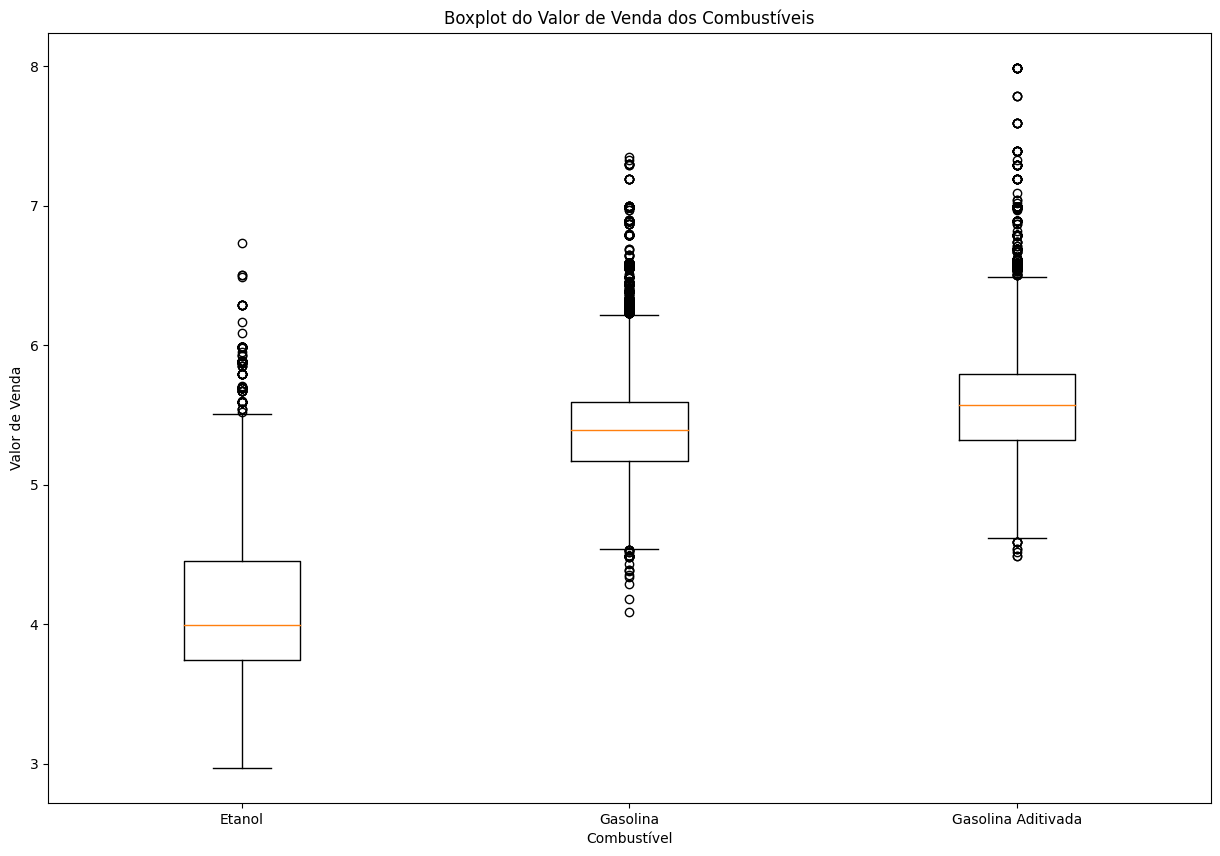

In [34]:
import matplotlib.pyplot as plt

# Dados
dados = [etanol['Valor de Venda'], gasolina['Valor de Venda'], gasolina_aditivada['Valor de Venda']]
nomes_combustiveis = ['Etanol', 'Gasolina', 'Gasolina Aditivada']

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Cria√ß√£o do boxplot com outliers
plt.boxplot(dados, vert=True, labels=nomes_combustiveis, showfliers=True)  # vert=False para um boxplot horizontal

# T√≠tulo e r√≥tulos
plt.title('Boxplot do Valor de Venda dos Combust√≠veis')
plt.xlabel('Combust√≠vel')
plt.ylabel('Valor de Venda')

# Mostrar o gr√°fico
plt.show()

- Para confirmar, podemos ver que `99% ` dos valores da gasolina est√£o proximos ao limite superior do outlier

In [35]:
quantile = gasolina['Valor de Venda'].quantile(.99)
dados ={
    'Combust√≠vel': 'Gasolina',
    '99%': quantile,
    'limite superior': limite_outlier_superior_gasolina,
}
df_quantile_limite = pd.DataFrame(dados, index=[0])
df_quantile_limite

Combust√≠vel   99%  limite superior
0    Gasolina  6.59             6.22

# <font color = orange>**Respondendo as Perguntas**

---

### <font color = orange>**1. Como se comportaram o pre√ßo dos combust√≠veis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tend√™ncia de queda ou diminui√ß√£o?**

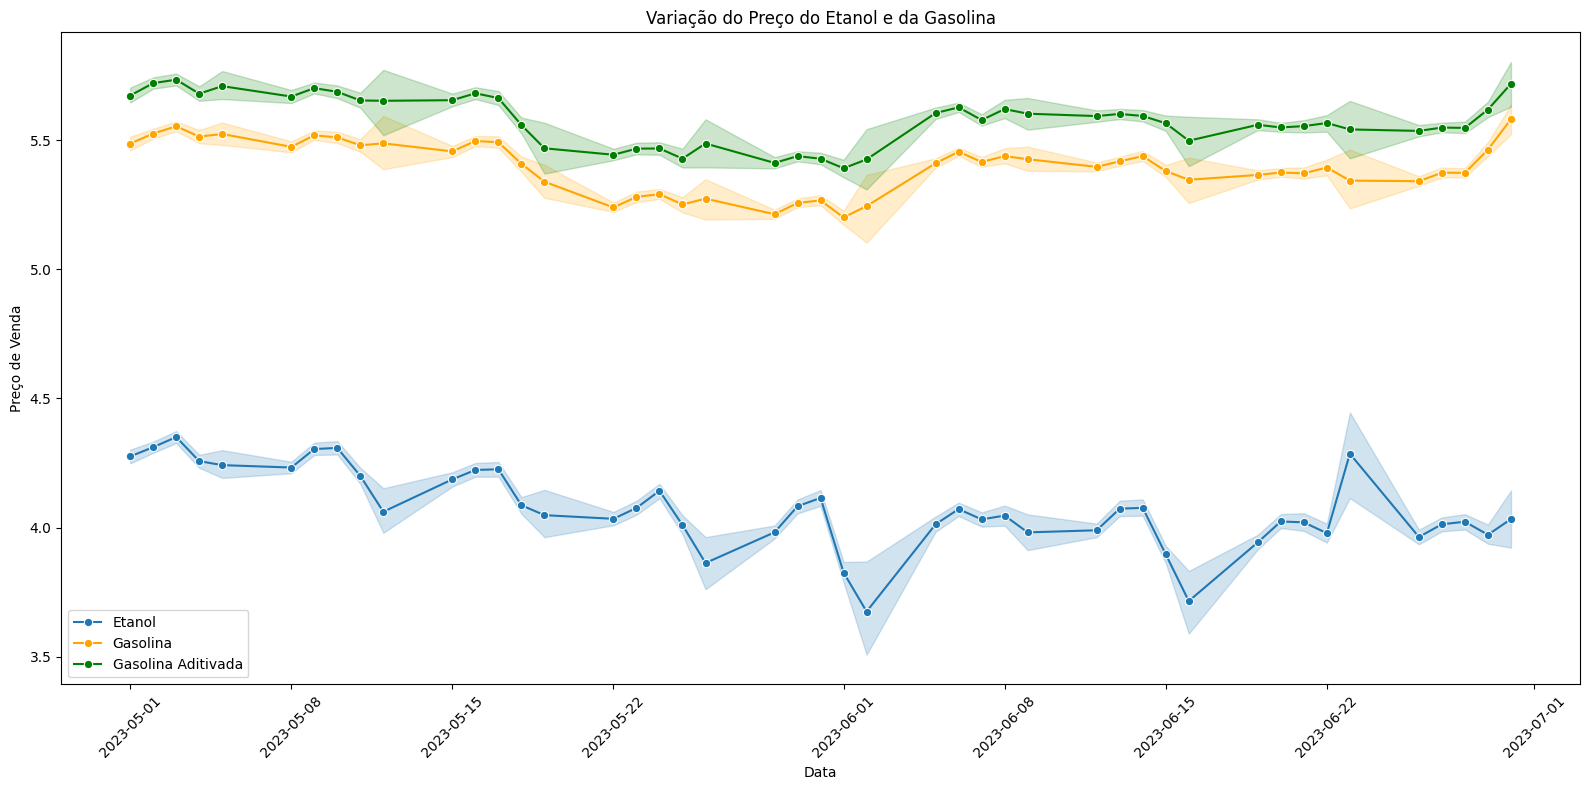

In [36]:
# Usaremos nossas vari√°veis j√° criadas "gasolina", "etanol" e "gasolina_aditivada para plotar um gr√°fico do valores ao longo dos dois meses

plt.figure(figsize=(16,8))
sns.lineplot(data=etanol, x='Data da Coleta', y='Valor de Venda', marker='o', label='Etanol')
sns.lineplot(data=gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina')
sns.lineplot(data=gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina Aditivada')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Venda')
plt.title('Varia√ß√£o do Pre√ßo do Etanol e da Gasolina')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

###  <font color = orange>**2. Qual o pre√ßo m√©dio da gasolina e do etanol nesses dois meses?**


In [37]:
# Pre√ßo medio da gasolina no mes de Maio

gasolina_maio = gasolina[gasolina['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean() 

# Pre√ßo medio da gasolina no mes de Junho

gasolina_junho = gasolina[gasolina['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

# Pre√ßo medio do Etaanol no mes de Maio

etanol_maio = etanol[etanol['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean()


# Pre√ßo medio do Etaanol no mes de Junho

etanol_junho = etanol[etanol['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

# Pre√ßo medio da gasolina aditivada no mes de Maio

gasolina_aditivada_maio = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean()

# Pre√ßo medio da gasolina aditivada no mes de Junho

gasolina_aditivada_junho = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

In [38]:
data = {
    'Combust√≠vel': ['Gasolina', 'Etanol', 'Gasolina Aditivada'],
    'Maio': [gasolina_maio, etanol_maio, gasolina_aditivada_maio],
    'Junho': [gasolina_junho, etanol_junho, gasolina_aditivada_junho]
}

df_precos_medios = pd.DataFrame(data)
df_precos_medios.round(2)

Combust√≠vel  Maio  Junho
0            Gasolina  5.40   5.39
1              Etanol  4.18   4.01
2  Gasolina Aditivada  5.59   5.57

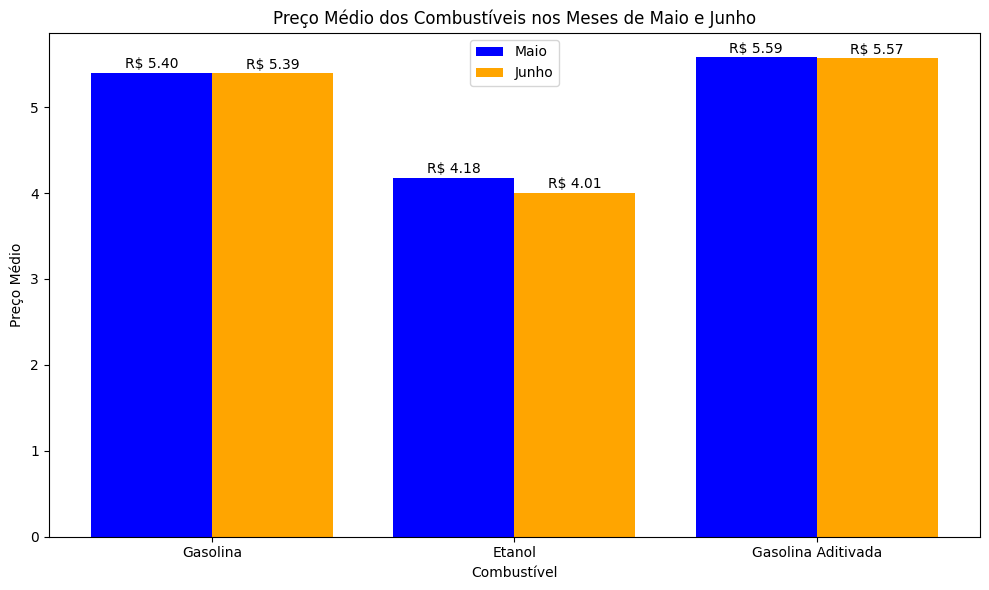

In [39]:
import matplotlib.pyplot as plt

# Dados
combustiveis = ['Gasolina', 'Etanol', 'Gasolina Aditivada']
precos_maio = [gasolina_maio, etanol_maio, gasolina_aditivada_maio]
precos_junho = [gasolina_junho, etanol_junho, gasolina_aditivada_junho]

# Configurar os valores das barras
bar_width = 0.4
r1 = range(len(combustiveis))
r2 = [x + bar_width for x in r1]

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.bar(r1, precos_maio, width=bar_width, label='Maio', color='blue')
plt.bar(r2, precos_junho, width=bar_width, label='Junho', color='orange')

# Adicionar r√≥tulos e t√≠tulo
plt.xlabel('Combust√≠vel')
plt.ylabel('Pre√ßo M√©dio')
plt.title('Pre√ßo M√©dio dos Combust√≠veis nos Meses de Maio e Junho')
plt.xticks([r + bar_width/2 for r in range(len(combustiveis))], combustiveis)
plt.legend()

# Adicionar valores acima das barras
for i, v in enumerate(precos_maio):
    plt.text(i, v + 0.05, f'R$ {v:.2f}', ha='center', color='black')

for i, v in enumerate(precos_junho):
    plt.text(i + bar_width, v + 0.05, f'R$ {v:.2f}', ha='center', color='black')

# Mostrar o gr√°fico
plt.tight_layout()
plt.show()


###  <font color = orange>**3. Quais os 5 estados com o pre√ßo m√©dio da gasolina e do etanol mais caros?**

- Vamos levar em considera√ß√£o os 2 meses que estamos analisando 

In [40]:
import pandas as pd

# Calcular os pre√ßos m√©dios por estado para gasolina, etanol e gasolina aditivada
gasolina_estados = gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
etanol_estados = etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()
gasolina_aditivada_estados = gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os pre√ßos m√©dios por estado
df_precos_medios = pd.DataFrame({
    'Gasolina': gasolina_estados,
    'Etanol': etanol_estados,
    'Aditivada': gasolina_aditivada_estados
})

# Ordenar o DataFrame em ordem decrescente com base nos pre√ßos m√©dios de gasolina
df_precos_medios = df_precos_medios.sort_values(by='Gasolina', ascending=False)

# Selecionar os 5 primeiros estados
top5_estados = df_precos_medios
# Imprimir o DataFrame com os pre√ßos m√©dios dos 5 estados mais caros
top5_estados.head().round(2)



Gasolina  Etanol  Aditivada
Estado - Sigla                             
AM                  6.36    4.60       6.34
AC                  6.12    4.78       6.15
RO                  5.90    4.95       5.97
RR                  5.86    5.05       5.93
AL                  5.67    4.53       5.81

###  <font color = orange>**4. Qual o pre√ßo m√©dio da gasolina e do etanol por estado?**

In [41]:
# Configura√ß√£o para mostrar todas as colunas do dataframe abaixo
pd.set_option('display.max_columns', None)

df_precos_medios.round(2).T

Estado - Sigla    AM    AC    RO    RR    AL    RN    TO    CE    BA    PA  \
Gasolina        6.36  6.12  5.90  5.86  5.67  5.67  5.67  5.60  5.55  5.53   
Etanol          4.60  4.78  4.95  5.05  4.53  4.58  4.58  4.60  4.39  4.78   
Aditivada       6.34  6.15  5.97  5.93  5.81  5.75  5.79  5.74  5.64  5.78   

Estado - Sigla    SC    ES    RJ    PR    DF    PI    GO    MT    RS    MS  \
Gasolina        5.53  5.51  5.50  5.45  5.44  5.43  5.38  5.37  5.35  5.34   
Etanol          4.68  4.50  4.44  4.13  3.93  4.41  3.90  3.60  4.87  3.98   
Aditivada       5.65  5.68  5.65  5.61  5.55  5.64  5.51  5.50  5.52  5.54   

Estado - Sigla    MA    PE    SP    MG    SE    PB    AP  
Gasolina        5.31  5.27  5.26  5.26  5.24  5.20  5.02  
Etanol          4.66  4.24  3.75  3.86  4.34  4.07  5.24  
Aditivada       5.42  5.44  5.51  5.44  5.33  5.38  5.31

In [42]:
# Restaurar as configura√ß√µes padr√£o de visualiza√ß√£o do pandas
pd.reset_option('display.max_columns')

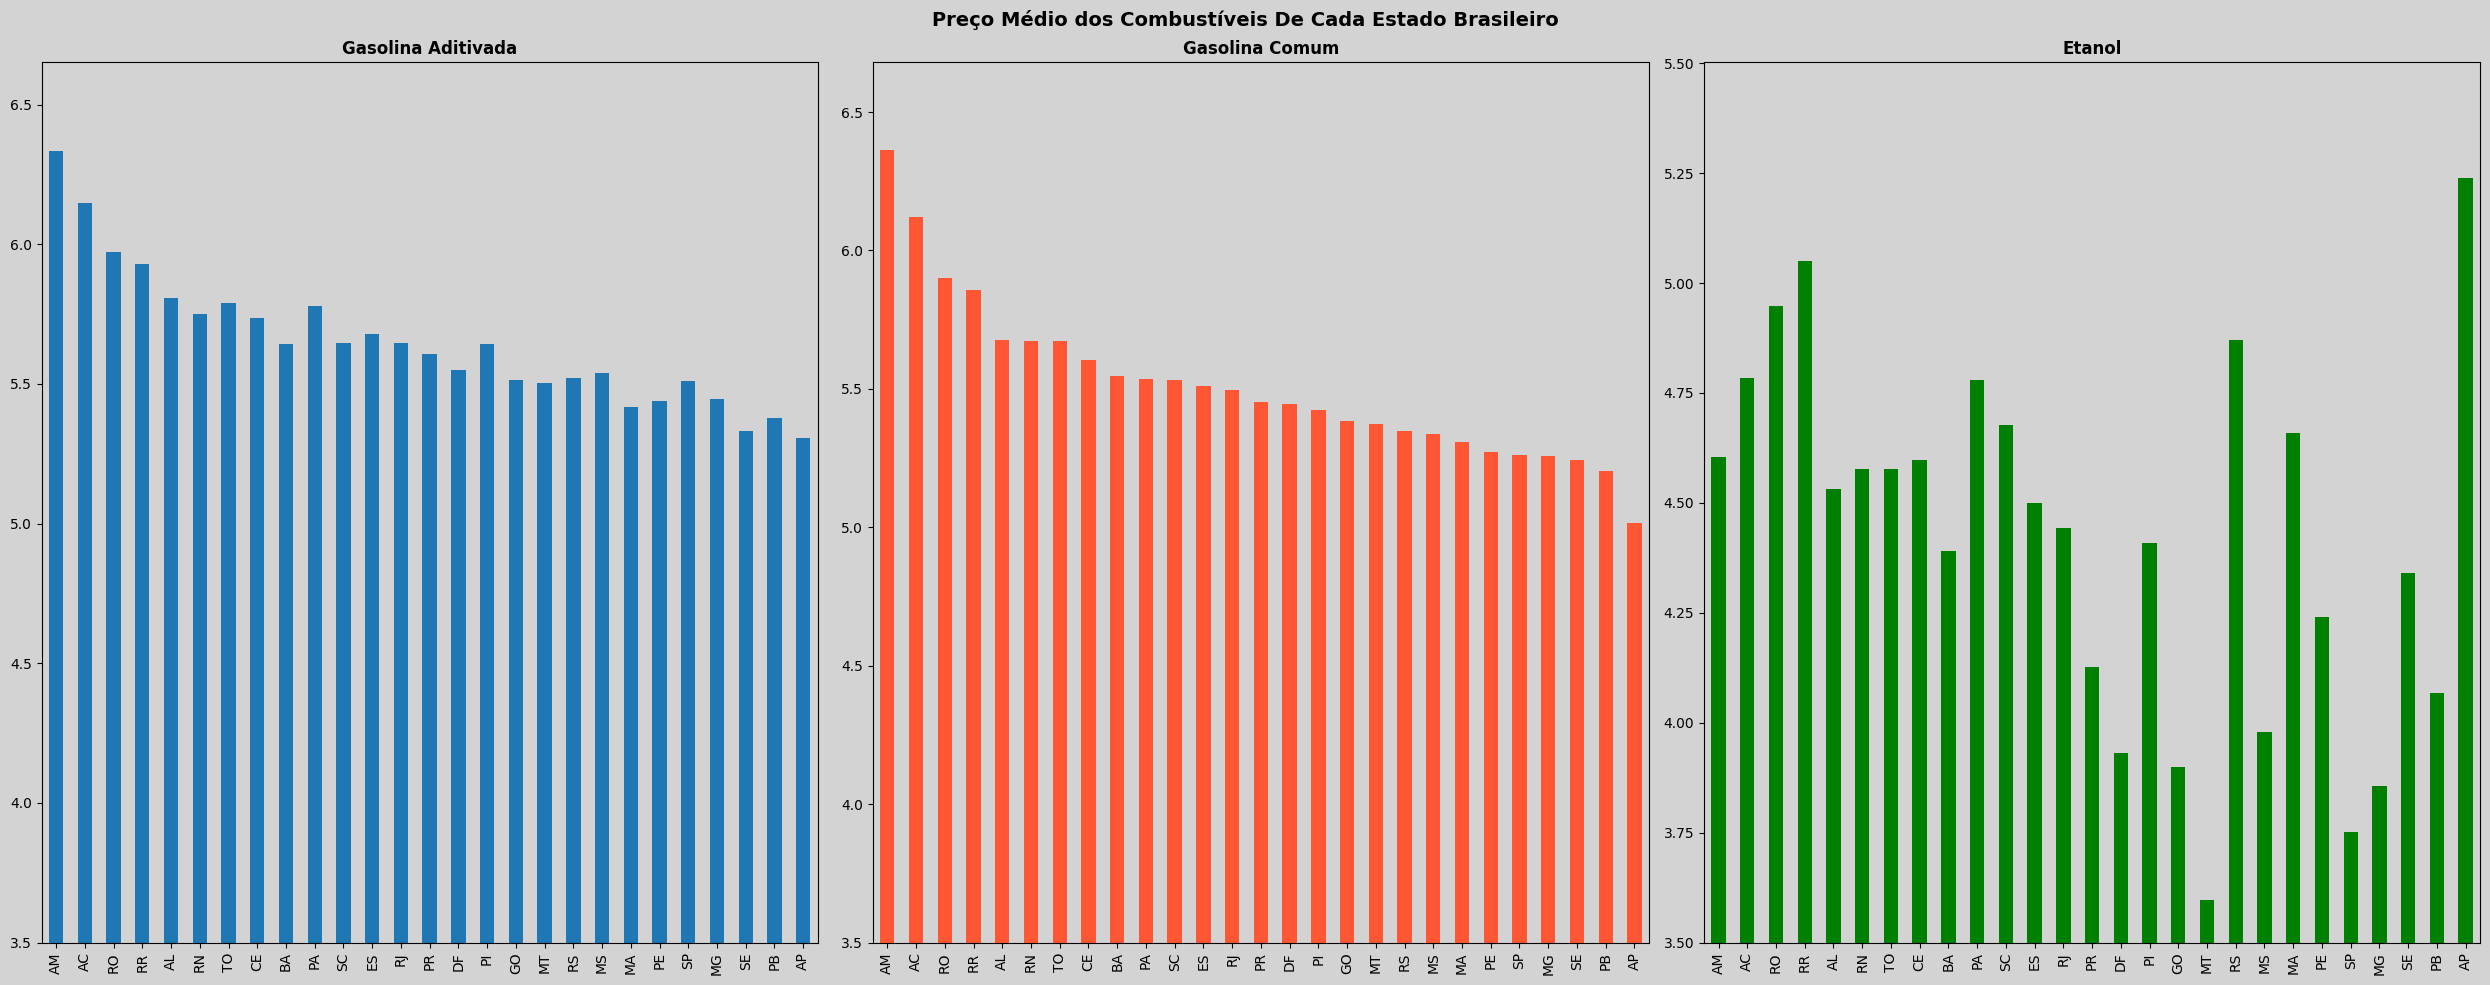

In [43]:
# Gasolina Aditivada
figura = plt.figure(figsize=(25, 15), facecolor='lightgray')
figura.suptitle('Pre√ßo M√©dio dos Combust√≠veis De Cada Estado Brasileiro', fontsize=14, fontweight='bold')

figura.add_subplot(131, facecolor='lightgray')
df_precos_medios['Aditivada'].plot(kind='bar', figsize=(25, 10), ylim=3.5)
plt.title('Gasolina Aditivada', fontsize=12, fontweight='bold')
plt.xlabel(None)

# Gasolina Comum
figura.add_subplot(132, facecolor='lightgray')
df_precos_medios['Gasolina'].plot(kind='bar', figsize=(25, 10), ylim=3.5, color='#FF5733')
plt.title('Gasolina Comum', fontsize=12, fontweight='bold')
plt.xlabel(None)

# Etanol
figura.add_subplot(133, facecolor='lightgray')
df_precos_medios['Etanol'].plot(kind='bar', figsize=(25, 10), ylim=3.5, color='green')
plt.title('Etanol', fontsize=12, fontweight='bold')
plt.xlabel(None)

plt.tight_layout()

Como podemos observar no DataFrame e visualmente no gr√°fico acima, temos a m√©dia de pre√ßos dos combust√≠veis de todos os estados brasileiros. Por diversos fatores um estado pode ter o combust√≠vel mais caro que outro, seja pela cobran√ßa de impostos que √© diferente de um estado para outro ou pela dificuldade de transporte para estados mais distantes do litoral, uma solu√ß√£o seria resolver o problema de infraestrutura para que o combust√≠vel possa chegar a um pre√ßo competitivo nesses locais, em especial na regi√£o Norte do pa√≠s. Podemos obter as seguintes conclus√µes analisando o gr√°fico acima.

- Os estados da regi√£o **Norte** tem a m√©dia de pre√ßo mais cara do Pa√≠s.
- Os estados mais pr√≥ximos a costa tendem a ter o pre√ßo m√©dio menor em compara√ß√£o ao restante do pa√≠s, pois √© onde a produ√ß√£o e importa√ß√£o dos combust√≠veis acontece.
- O estado do **Amap√°** possui a menor m√©dia de pre√ßo da Gasolina do pa√≠s, mas por outro lado, possui o etanol mais caro.
- A m√©dia de pre√ßo mais alta da Gasolina e Gasolina Aditivada √© do estado do **Amazonas**.
- O estado do **Mato Grosso** tem a m√©dia de pre√ßo do Etanol mais barata do Brasil. Apesar de ser o 3¬∞ maior produtor do biocombust√≠vel no Brasil.



###  <font color = orange>**5. Qual o munic√≠pio que possui o menor pre√ßo para a gasolina e para o etanol?**


In [105]:



# Juntar os DataFrames de gasolina, etanol e gasolina aditivada
df_combustiveis = pd.concat([gasolina, etanol, gasolina_aditivada], ignore_index=True)

# Calcular os menores pre√ßos por munic√≠pio para cada tipo de combust√≠vel
menores_precos = df_combustiveis.groupby(['Municipio', 'Estado - Sigla', 'Produto'])['Valor de Venda'].min()

# Resetar o √≠ndice para tornar os grupos em colunas
df_menores_precos = menores_precos.reset_index()

# Encontrar o munic√≠pio com o menor pre√ßo para cada tipo de combust√≠vel
menor_preco_gasolina = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))
menor_preco_etanol = df_menores_precos[df_menores_precos['Produto'] == 'ETANOL'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))
menor_preco_aditivada = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA ADITIVADA'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))

# Concatenar os resultados dos menores pre√ßos para cada tipo de combust√≠vel
df_menores_preco_por_combustivel = pd.concat([menor_preco_gasolina, menor_preco_etanol, menor_preco_aditivada])
df_menores_preco_por_combustivel.reset_index(drop=True, inplace=True)
# Imprimir o DataFrame com os munic√≠pios com os menores pre√ßos para cada tipo de combust√≠vel
df_menores_preco_por_combustivel


Municipio Estado - Sigla             Produto  Valor de Venda
0  INDAIATUBA             SP            GASOLINA            4.09
1    BARRETOS             SP              ETANOL            2.97
2   SAO PAULO             SP  GASOLINA ADITIVADA            4.49



###  <font color = orange>**6. Qual o munic√≠pio que possui o maior pre√ßo para a gasolina e para o etanol?**

In [109]:
# Encontrar o munic√≠pio com o maior pre√ßo para a gasolina e para o etanol
maior_preco_gasolina = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
maior_preco_etanol = df_menores_precos[df_menores_precos['Produto'] == 'ETANOL'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
maior_preco_aditivada = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA ADITIVADA'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
# Concatenar os resultados dos maiores pre√ßos para cada tipo de combust√≠vel
df_maiores_preco_por_combustivel = pd.concat([maior_preco_gasolina, maior_preco_etanol,maior_preco_aditivada ])
df_maiores_preco_por_combustivel.reset_index(drop=True, inplace=True)

# Imprimir o DataFrame com os munic√≠pios com os maiores pre√ßos para a gasolina e o etanol
df_maiores_preco_por_combustivel


Municipio Estado - Sigla             Produto  Valor de Venda
0        PARINTINS             AM            GASOLINA            6.79
1  CRUZEIRO DO SUL             AC              ETANOL            5.49
2        PARINTINS             AM  GASOLINA ADITIVADA            6.89

###  <font color = orange>**7. Qual a regi√£o que possui o maior valor m√©dio da gasolina?**

In [116]:


# Calcular os valores m√©dios por regi√£o para a gasolina aditivada
media_gasolina_aditivada_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regi√µes com os maiores valores m√©dios da gasolina aditivada
top5_regioes_gasolina_aditivada = media_gasolina_aditivada_por_regiao.nlargest(5)

# Criar um DataFrame com as 5 regi√µes e seus valores m√©dios de gasolina aditivada
df_top5_regioes_gasolina_aditivada = pd.DataFrame({
    'Regiao': top5_regioes_gasolina_aditivada.index,
    'Valor M√©dio Gasolina Aditivada': top5_regioes_gasolina_aditivada.round(2)
})

# Calcular os valores m√©dios por regi√£o para a gasolina
media_gasolina_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regi√µes com os maiores valores m√©dios da gasolina
top5_regioes_gasolina = media_gasolina_por_regiao.nlargest(5)

# Criar um DataFrame com as 5 regi√µes e seus valores m√©dios de gasolina
df_top5_regioes_gasolina = pd.DataFrame({
    'Regiao': top5_regioes_gasolina.index,
    'Valor M√©dio Gasolina': top5_regioes_gasolina.round(2)
})

# Combinar os DataFrames das duas gasolinas
df_top5_regioes = pd.merge(df_top5_regioes_gasolina, df_top5_regioes_gasolina_aditivada, on='Regiao', how='outer')

# Imprimir o DataFrame
df_top5_regioes


Regiao  Valor M√©dio Gasolina  Valor M√©dio Gasolina Aditivada
0      N                  5.78                            5.95
1     NE                  5.45                            5.59
2      S                  5.43                            5.58
3     CO                  5.38                            5.52
4     SE                  5.31                            5.53

### <font color = orange>**8. Qual a regi√£o que possui o menor valor m√©dio do etanol?**

In [125]:


# Calcular os valores m√©dios por regi√£o para o etanol
media_etanol_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regi√µes com os menores valores m√©dios do etanol
top5_regioes_etanol = media_etanol_por_regiao.nsmallest(5)

# Criar um DataFrame com as 5 regi√µes e seus valores m√©dios de etanol
df_top5_regioes_etanol = pd.DataFrame({
    
    'Valor M√©dio Etanol': top5_regioes_etanol.round(2)
})

# Imprimir o DataFrame
df_top5_regioes_etanol


Valor M√©dio Etanol
Regiao - Sigla                    
CO                            3.86
SE                            3.90
NE                            4.41
S                             4.42
N                             4.72

###  <font color = orange>**9. H√° alguma correla√ß√£o entre o valor do combust√≠vel (gasolina e etanol) e a regi√£o onde ele √© vendido?**

###  <font color = orange>**10. H√° alguma correla√ß√£o entre o valor do combust√≠vel (gasolina e etanol) e a bandeira que vende ele?**

###  <font color = orange>**11. Pergunta extra (editar)**

###  <font color = orange>**12. Pergunta extra (editar)**

###  <font color = orange>**13. Pergunta extra (editar)**